<a href="https://colab.research.google.com/github/zlximon/Tensorflow_DL/blob/master/TransferLearning(fine_tuning).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# helper functions
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2022-05-19 16:14:35--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-05-19 16:14:36 (77.8 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [2]:
#import our helper functions 
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir


In [3]:
# downloding data 
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
unzip_data("10_food_classes_10_percent.zip")


--2022-05-19 16:14:39--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.133.128, 74.125.140.128, 66.102.1.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.133.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M  61.2MB/s    in 2.6s    

2022-05-19 16:14:42 (61.2 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [4]:
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent

In [5]:
train_dir="10_food_classes_10_percent/train"
test_dir="10_food_classes_10_percent/test"

In [6]:
import tensorflow as tf
IMAGE_SIZE=(224,224)

train_data_10p=tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,image_size=IMAGE_SIZE, label_mode="categorical",batch_size=32)
test_data=tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,image_size=IMAGE_SIZE, label_mode="categorical",batch_size=32)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [21]:
#in this way of creation train_data , our output type is BatchDataset with is diffrent from previous one 
train_data_10p

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [8]:
train_data_10p.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [25]:
#creating model with functional API , functional API gives more flexibility
base_model=tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False 
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")
#x=tf.keras.layers.experimental.preprocessing.Rescaling(1/255.)(input) , if we need normalizing 
x = base_model(inputs)
x=tf.keras.layers.GlobalAveragePooling2D(name="global_average_layer")(x)#
outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)
model1=tf.keras.Model(inputs, outputs)
model1.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])
history1=model1.fit(train_data_10p,
                                 epochs=5,
                                 steps_per_epoch=len(train_data_10p),
                                 validation_data=test_data,
                                 validation_steps=int(0.25 * len(test_data)),
                                 callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                                        experiment_name="10_percent_feature_extraction")])

Saving TensorBoard log files to: transfer_learning/10_percent_feature_extraction/20220519-163253
Epoch 1/5
24/24 [==============================] - 15s 341ms/step - loss: 1.9546 - accuracy: 0.3733 - val_loss: 1.3765 - val_accuracy: 0.7089
Epoch 2/5
24/24 [==============================] - 7s 268ms/step - loss: 1.1859 - accuracy: 0.7067 - val_loss: 0.9376 - val_accuracy: 0.7895
Epoch 3/5
24/24 [==============================] - 7s 272ms/step - loss: 0.8613 - accuracy: 0.7947 - val_loss: 0.7428 - val_accuracy: 0.8240
Epoch 4/5
24/24 [==============================] - 9s 360ms/step - loss: 0.7058 - accuracy: 0.8240 - val_loss: 0.6717 - val_accuracy: 0.8257
Epoch 5/5
24/24 [==============================] - 9s 358ms/step - loss: 0.6047 - accuracy: 0.8520 - val_loss: 0.6006 - val_accuracy: 0.8536


In [26]:
model1.evaluate(test_data)

79/79 [==============================] - 11s 132ms/step - loss: 0.6106 - accuracy: 0.8484


[0.6106187701225281, 0.8483999967575073]

In [ ]:
for layer_number,layer in enumerate(base_model.layers):
  print(layer_number,layer.name)

In [ ]:
base_model.summary()

In [30]:
model1.summary()

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_layer (Globa  (None, 1280)             0         
 lAveragePooling2D)                                              
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


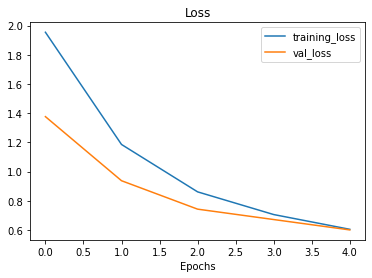

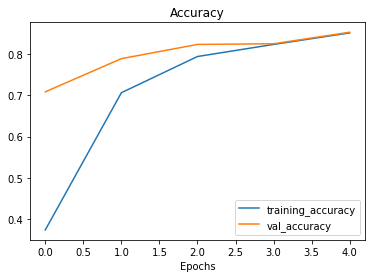

In [31]:
plot_loss_curves(history1)

In [41]:
#GlobalAveragePooling2D
tf.random.set_seed(42)
input_shape=(1,4,4,3)
input_tensor=tf.random.normal(input_shape)
#print("random input tensor :\n",input_tensor)
GlobalAveragePooling2D=tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
print("GlobalAveragePooling2D tensor :\n",GlobalAveragePooling2D)

print("input_tensor",input_tensor.shape)
print("input_shape",GlobalAveragePooling2D.shape)
#GlobalAveragePooling2D condensed our layers 

GlobalAveragePooling2D tensor :
 tf.Tensor([[-0.09368646 -0.45840448 -0.2885598 ]], shape=(1, 3), dtype=float32)
input_tensor (1, 4, 4, 3)
input_shape (1, 3)


In [44]:
tf.reduce_mean(input_tensor,axis=[1,2])

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.09368646, -0.45840448, -0.2885598 ]], dtype=float32)>

so GlobalAveragePooling2D , takes the average the second , and third dimension and replace them  

In [45]:
#GlobalMaxPooling2D
tf.random.set_seed(42)
input_shape=(1,4,4,3)
input_tensor=tf.random.normal(input_shape)
#print("random input tensor :\n",input_tensor)
GlobalMaxPooling2D=tf.keras.layers.GlobalMaxPooling2D()(input_tensor)
print("GlobalMaxPooling2D tensor :\n",GlobalMaxPooling2D)

print("input_tensor",input_tensor.shape)
print("input_shape",GlobalMaxPooling2D.shape)
#GlobalMaxPooling2D condensed our layers 

GlobalMaxPooling2D tensor :
 tf.Tensor([[0.9058464 1.1603122 1.6994323]], shape=(1, 3), dtype=float32)
input_tensor (1, 4, 4, 3)
input_shape (1, 3)


In [46]:
tf.reduce_max(input_tensor,axis=[1,2])

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[0.9058464, 1.1603122, 1.6994323]], dtype=float32)>

#Models with 1% of data 

In [47]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip 
unzip_data("10_food_classes_1_percent.zip")

--2022-05-19 17:21:16--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.133.128, 74.125.140.128, 173.194.76.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.133.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M  71.3MB/s    in 1.8s    

2022-05-19 17:21:19 (71.3 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [48]:

train_dir_1p="10_food_classes_1_percent/train"
test_dir="10_food_classes_1_percent/test"

In [51]:
IMG_SIZE=(224,224)
train_data_1p=tf.keras.preprocessing.image_dataset_from_directory(train_dir_1p,label_mode="categorical",image_size=IMAGE_SIZE,batch_size=32  ,)
test_data=tf.keras.preprocessing.image_dataset_from_directory(test_dir,label_mode="categorical",image_size=IMAGE_SIZE,batch_size=32  ,)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.
